In [10]:
from numpy import sqrt
import numpy as np
from pylab import figure,plot,xlim,xlabel,ylim,ylabel,grid,title,show
from numpy import sqrt,array,arange
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import pandas
from mpl_toolkits.mplot3d import Axes3D
#
# Given values
#

q = 1.60e-19 # q = particle charge [C]
m = 7.0*1.67e-27 # m = Li+ mass [Kg]
KE_eV = 100.0 # KE_eV particle kinetic energy [eV]
E = [0.0, -105.0, 0.0] # E = electric field vector [x, y, z] [N/C]
B = [0.002, 0.0 , 0.0] # B = magnetic field vector [x, y, z] [T]

L = .25 # Length traveled in field [mm]
u = [1.0, 1.0, 100.0]/sqrt(10002.0) #velocity vector u-hat

#
# Derived values
#


In [11]:

qm = q/m # charge over mass [C/Kg]
KE = KE_eV*1.602e-19 #Particle becomes charged by E field [J]
v = sqrt(2.0*KE/m) # KE = 1/2mv^2 particle velocity magnitude [m/s]
v_x = v*u[0] # initial velocity in x-hat 
v_y = v*u[1] # initial velocity in y-hat
v_z = v*u[2] # initial velocity in z-hat
v_s = [v_x, v_y, v_z] # velocity vector
vzpass = -E[1]/B[0] # vzpass = velocity of z without apperature deflection
tmax = L/v_z 


In [12]:
# 

def derivs (r,t): 
    d = [r[1], r[3], r[5]] # r[1] = v_x, r[3] = v_y, r[5] = v_z
    dd = qm * (E + np.cross (d,B)) 
    return array([d[0],dd[0],d[1],dd[1],d[2],dd[2]],float)
#
#


In [13]:
# initial conditions 
p = [0,0,0] # [x,y,z] intitial coordinates of particle [m]

In [14]:
def combine (p,v_s):
    r = []
    for i in np.arange(len(p)):
        addition = [p[i],v_s[i]]
        r = np.append(r, addition)
    return r
r0 = combine (p,v_s) #organizing intiial conditions, [x,vx,y,vy,z,vz]
print (r[0])

NameError: name 'r' is not defined

In [15]:
# Set up the time interval
t1 = 0.0 # initial time
t2 = tmax # final scaled time
N = 1000 # number of time steps
h = (t2-t1)/N # time step size

# The array of time values at which to store the solution
tpoints = arange(t1,t2,h)
#

# Calculate the solution using odeint
r = odeint(derivs,r0,tpoints) ######### integrating (ordinary differential equation)

#print("The magnitude of the initial velocity is " + str(int(v)) + " m/s.")
#print("The x-component of the acceleration is " + str(int(a[0])) + " m/s^2.")
#print("The y-component of the acceleration is " + str(int(a[1])) + " m/s^2.")
#print("The z-component of the acceleration is " + str(int(a[2])) + " m/s^2.")

print (t2)

4.775781354586544e-06


In [16]:
#
#  Extract the 1D matrices of position values
#

xmin = min(r[:,0])
xmax = max(r[:,0])
ymin = min(r[:,2])
ymax = max(r[:,2])
zmin = min(r[:,4])
zmax = max(r[:,4])

In [17]:
#  Calculate the final velocity
vx = r[:,1]
vxf = vx[N-1]
vy = r[:,3]
vyf = vy[N-1]
vz = r[:,5]
vzf = vz[N-1]
vf = sqrt(vxf*vxf+vyf+vyf+vzf*vzf)
KEf_eV = 0.5*m*vf*vf/1.60e-19

In [18]:
print(vx[0])
print(vzpass)
print(v)
print(vf)
print(KE_eV)
print(KEf_eV)

523.4745509442264
52500.0
52352.689578220976
52283.21244706547
100.0
99.85942503514512


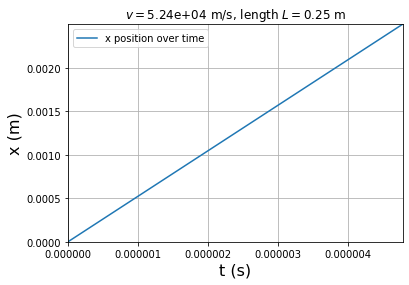

In [19]:
# x-position vs time
plt.plot(tpoints,r[:,0])
plt.xlim(t1,t2)
plt.ylim(xmin,xmax)
plt.xlabel("t (s)", fontsize=16)
plt.ylabel("x (m)",fontsize=16)
plt.title('$v = $%.2e m/s, length $L = $%.2f m'%(v,L))
plt.legend(["x position over time"])
grid(True)
plt.show()

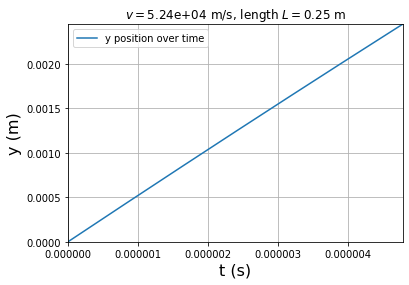

In [20]:
# y-position vs time
plt.plot(tpoints,r[:,2])
plt.xlim(t1,t2)
plt.ylim(ymin,ymax)
plt.xlabel("t (s)", fontsize=16)
plt.ylabel("y (m)",fontsize=16)
plt.title('$v = $%.2e m/s, length $L = $%.2f m'%(v,L))
plt.legend(["y position over time"])
grid(True)
plt.show()

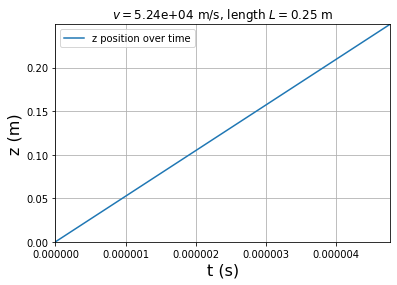

In [21]:
# z-position vs time
plt.plot(tpoints,r[:,4])
plt.xlim(t1,t2)
plt.ylim(zmin,zmax)
plt.xlabel("t (s)", fontsize=16)
plt.ylabel("z (m)",fontsize=16)
plt.title('$v = $%.2e m/s, length $L = $%.2f m'%(v,L))
plt.legend(["z position over time"])
grid(True)
plt.show()

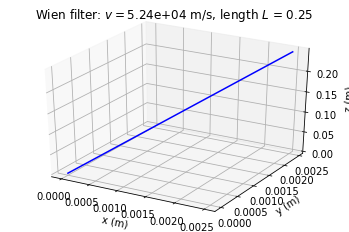

[0.         0.00025    0.0005     0.00075    0.001      0.00125
 0.00149999 0.00174999 0.00199999 0.00224999 0.00249998 0.00274998
 0.00299998 0.00324997 0.00349997 0.00374996 0.00399996 0.00424995
 0.00449995 0.00474994 0.00499993 0.00524993 0.00549992 0.00574991
 0.00599991 0.0062499  0.00649989 0.00674988 0.00699987 0.00724986
 0.00749985 0.00774984 0.00799983 0.00824982 0.00849981 0.0087498
 0.00899979 0.00924978 0.00949976 0.00974975 0.00999974 0.01024973
 0.01049971 0.0107497  0.01099968 0.01124967 0.01149965 0.01174964
 0.01199962 0.01224961 0.01249959 0.01274958 0.01299956 0.01324954
 0.01349952 0.01374951 0.01399949 0.01424947 0.01449945 0.01474943
 0.01499941 0.01524939 0.01549937 0.01574935 0.01599933 0.01624931
 0.01649929 0.01674927 0.01699925 0.01724922 0.0174992  0.01774918
 0.01799915 0.01824913 0.01849911 0.01874908 0.01899906 0.01924903
 0.01949901 0.01974898 0.01999896 0.02024893 0.0204989  0.02074888
 0.02099885 0.02124882 0.02149879 0.02174876 0.02199874 0.02224871

In [24]:
# start a new figure
plot_trajectory = figure()

# Plot the trajectory in 3D
ax = plot_trajectory.gca(projection='3d')
ax.plot(r[:,0],r[:,2],r[:,4],"b-")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
ax.set_title("Wien filter: $v = $%.2e m/s, length $L$ = %s"%(v,L))
grid(True)
show()
print(r[:,4])